In [1]:
import pandas as pd
import sys
import os
sys.path.append(os.path.abspath("../Instruments"))
import numpy as np
from ETF import ETF
from Future import Future
from Treasury import Treasury
from Portfolio import Portfolio
from risk_free_rate import get_risk_free_rate

# Long Only Portfolio With ETFs and Futures

In [2]:
SPY = ETF("SPY")
XLB = ETF("XLB")
XLF = ETF("XLF")
XLP = ETF("XLP")
XLY = ETF("XLY")
XLE = ETF("XLE")
XLI = ETF("XLI")
XLK = ETF("XLK")
XLU = ETF("XLU")
XLV = ETF("XLV")

ES1 = Future("ES1")
DX1 = Future("DX1")
TY1 = Future("TY1")
SI1 = Future("SI1")
CL1 = Future("CL1")
NG1 = Future("NG1")
GC1 = Future("GC1")
DBC = ETF("DBC")

all_etfs_futures = [XLB, XLF, XLP, XLY, XLE, XLI, XLK, XLU, XLV, ES1, DX1, TY1, SI1, CL1, NG1, GC1]


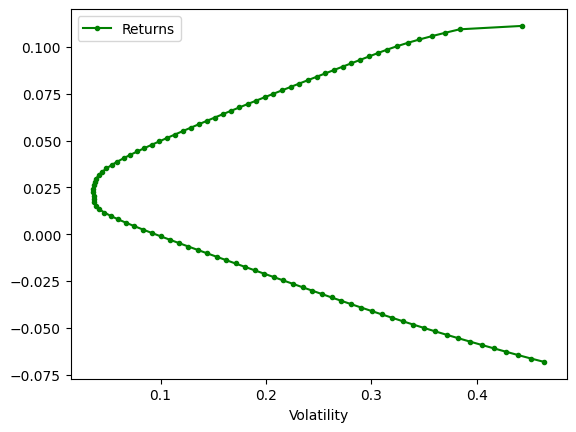

In [3]:
portfolio = Portfolio(all_etfs_futures, rf = get_risk_free_rate('2008-05-06'), equity_benchmark = SPY, future_benchmark = DBC)
portfolio.filter(startDate="2008-01-01", endDate="2024-01-01", period=1)
max_sharpe_ratio, ret, vol, weights = portfolio.max_sharpe_portfolio(n_points=100, min_weight=0, max_weight=1.0)
portfolio.plot_ef(n_points = 100, min_weight=0, max_weight=1.0)


In [4]:
print("MSR portfolio weights: " + str(weights))
print("MSR portfolio expected annualized log return: " + str(ret))
print("MSR portfolio annualized volatility of log returns: " + str(vol))
print("Sharpe Ratio of Portfolio: "+str(max_sharpe_ratio))
print("MSR portfolio VaR: "+str(portfolio.portfolio_VaR(weights)))
print("MSR portfolio ES: "+str(portfolio.portfolio_ES(weights)))
print()

MSR portfolio weights: [9.14513072e-02 5.34650425e-03 1.37774991e-16 1.29020059e-17
 1.90532428e-02 4.67381263e-03 5.92429253e-02 0.00000000e+00
 2.04464096e-02 0.00000000e+00 3.75009967e-01 4.23170920e-01
 1.26987179e-17 0.00000000e+00 3.36102673e-17 1.60491058e-03]
MSR portfolio expected annualized log return: 0.036895920998364806
MSR portfolio annualized volatility of log returns: 0.05357149608631835
Sharpe Ratio of Portfolio: 0.3630476804923728
MSR portfolio VaR: 0.08811726963879733
MSR portfolio ES: 0.1105026110945828



In [5]:
# Filters data to only 2020 election cycle
portfolio.filter(startDate="2020-01-01", endDate="2021-01-01", period=1)
portfolio.set_rf(get_risk_free_rate('2020-05-05'))
# See how the calculated weights using data up to 2016 election would have worked
# for the 2020 election
print("2020 election period actual annualized log returns: " + str(portfolio.historical_annualized_log_return(weights)))

# Filters data to May 5 to November 17 of 2019 (6.5 month period of a non-election year)
portfolio.filter(startDate="2019-05-05", endDate="2019-11-17", period=-1)
portfolio.set_rf(get_risk_free_rate('2019-05-06'))
print("2019 May 5 to November 17 actual annualized log returns: " +  str(portfolio.historical_annualized_log_return(weights)))

# Filters data to May 5 to November 17 of 2018 (6.5 month period of a non-election year)
portfolio.filter(startDate="2018-05-05", endDate="2018-11-17", period=-1)
portfolio.set_rf(get_risk_free_rate('2018-05-07'))
print("2018 May 5 to November 17 actual annualized log returns: " +  str(portfolio.historical_annualized_log_return(weights)))


# Filters data to May 5 to November 17 of 2017 (6.5 month period of a non-election year)
portfolio.filter(startDate="2017-05-05", endDate="2017-11-17", period=-1)
portfolio.set_rf(get_risk_free_rate('2017-05-05'))
print("2017 May 5 to November 17 actual annualized log returns: " +  str(portfolio.historical_annualized_log_return(weights)))

2020 election period actual annualized log returns: 0.04440755526878697
2019 May 5 to November 17 actual annualized log returns: 0.0673879383378952
2018 May 5 to November 17 actual annualized log returns: 0.022781387093746896
2017 May 5 to November 17 actual annualized log returns: 0.0030181626291228975
